In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from quicksemble.ensembler import Ensembler
from sklearn.linear_model import LogisticRegression
 
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Loading The Dataset

In [3]:
df = pd.read_csv(r"C:\Users\ASHISH PRATAP SINGH\Downloads\1767134-1729261-1613779-Red_wine__(1) (1).csv")

In [4]:
# data of top 5 rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [5]:
# data of bottom 5 rows
print(df.tail())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.52       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.52       0.75   
1597                 32.0                  44.0  0.99547  3.52       0.71   
1598                 18.0                  42.0  0.99549  3.52       0.66   

      alcohol  quality  
1594     10.5      5.0  


In [6]:
# datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [7]:
# statistical information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1598.0,46.433041,32.876249,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1598.0,3.498586,0.080346,2.74000,3.5200,3.52000,3.520000,3.90000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
# the correlation of each column in a DataFrame.
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.112792,0.668047,0.027553,0.183006,-0.061668,0.123987
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076703,0.022026,-0.046456,-0.260987,-0.202288,-0.390258
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035084,0.364947,0.008415,0.312770,0.109903,0.225867
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.200939,0.355283,0.040013,0.005527,0.042075,0.013756
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047815,0.200632,-0.258644,0.371260,-0.221141,-0.129011
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.668152,-0.021946,-0.025389,0.051658,-0.069408,-0.050899
total sulfur dioxide,-0.112792,0.076703,0.035084,0.200939,0.047815,0.668152,1.000000,0.070750,-0.162776,0.042109,-0.205914,-0.184699
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.070750,1.000000,-0.037946,0.148506,-0.496180,-0.174741
pH,0.027553,-0.046456,0.008415,0.040013,-0.258644,-0.025389,-0.162776,-0.037946,1.000000,-0.260525,0.233479,0.133961
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042109,0.148506,-0.260525,1.000000,0.093595,0.251118


In [9]:
#Preprocessing The Dataset

In [10]:
# checking for the null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [11]:
# filling of the missing values
for col, value in df.items():
    if col != 'type': #ignoring the 'type' column because the value is in string
        df[col] = df[col].fillna(df[col].mean())

In [12]:
# running again to check if null values are removed or not
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
df.max()

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        3.90000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

In [14]:
df.shape

(1599, 12)

In [15]:
#Visualization of Data, And Analyzing it

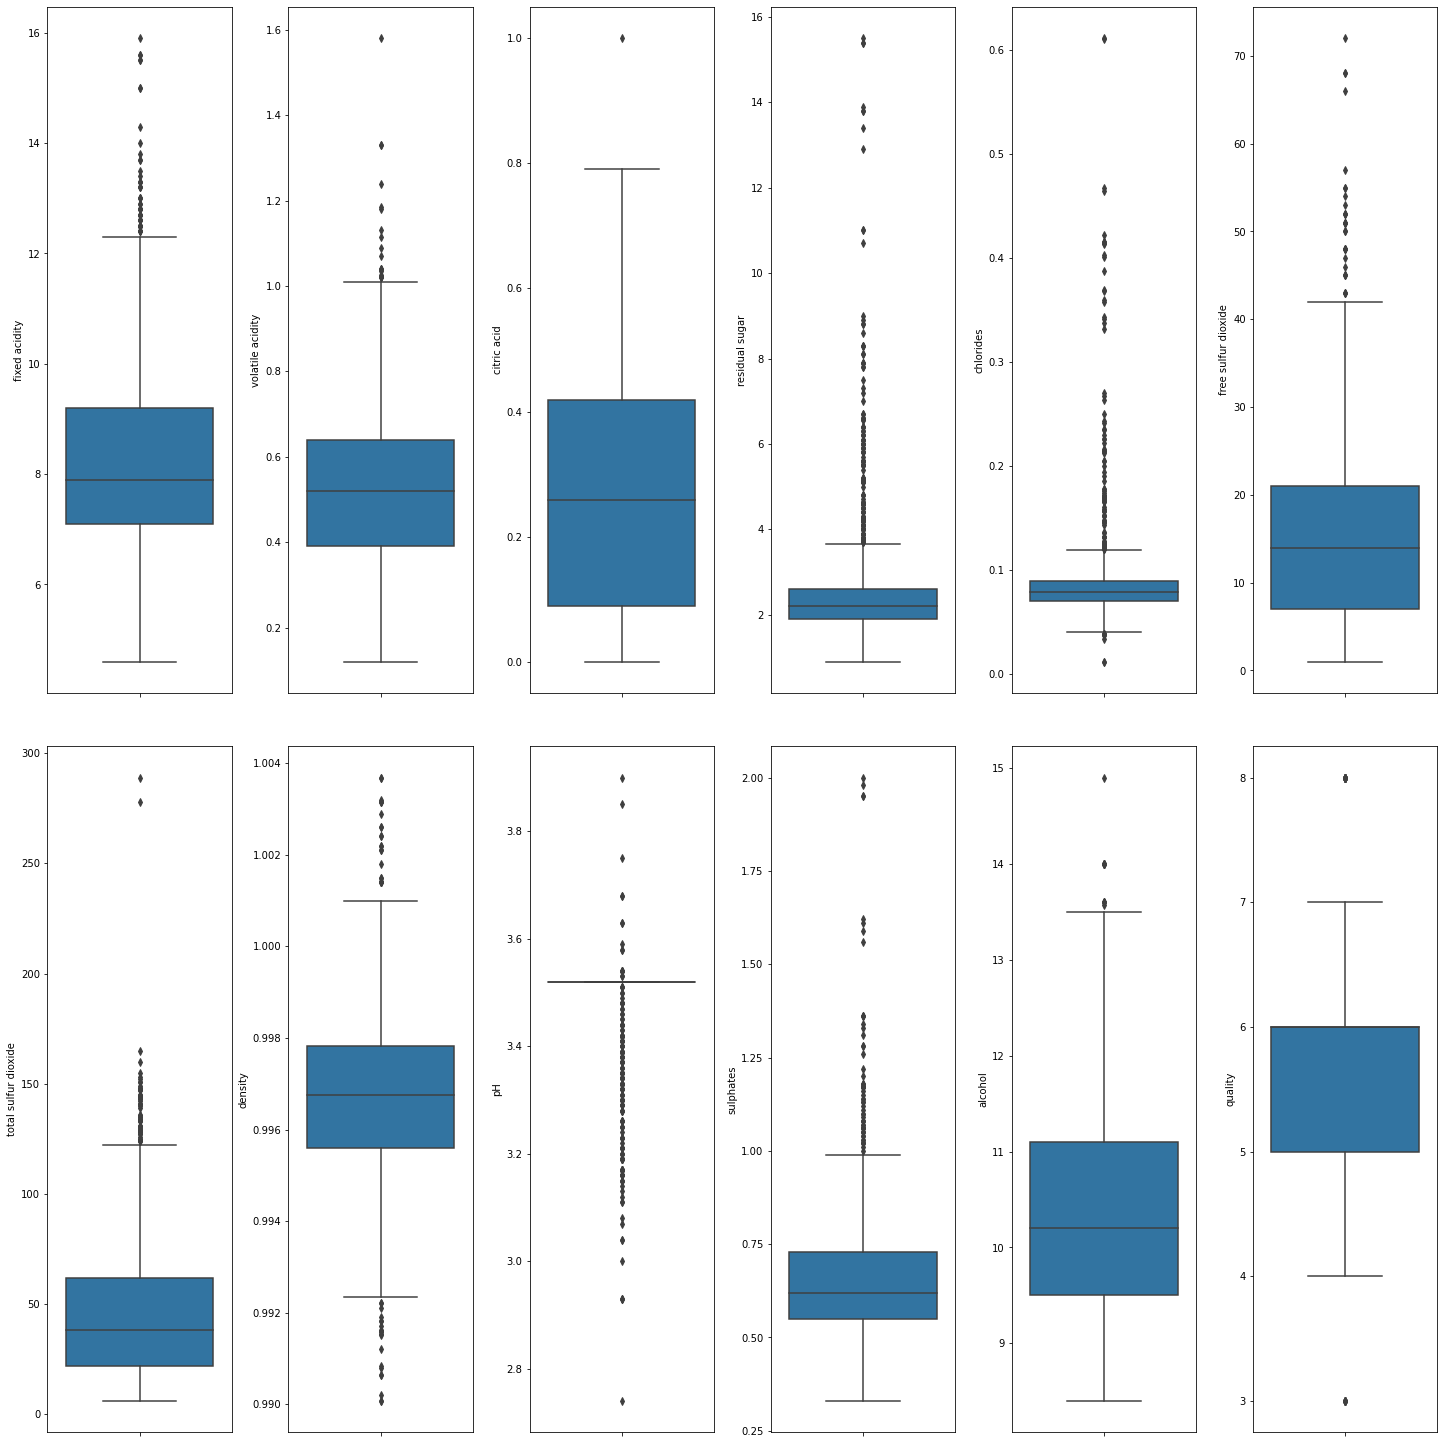

In [16]:
#creating plots in shape of different boxes
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,20))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
# to make the graphs look good, we will add this line in code
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

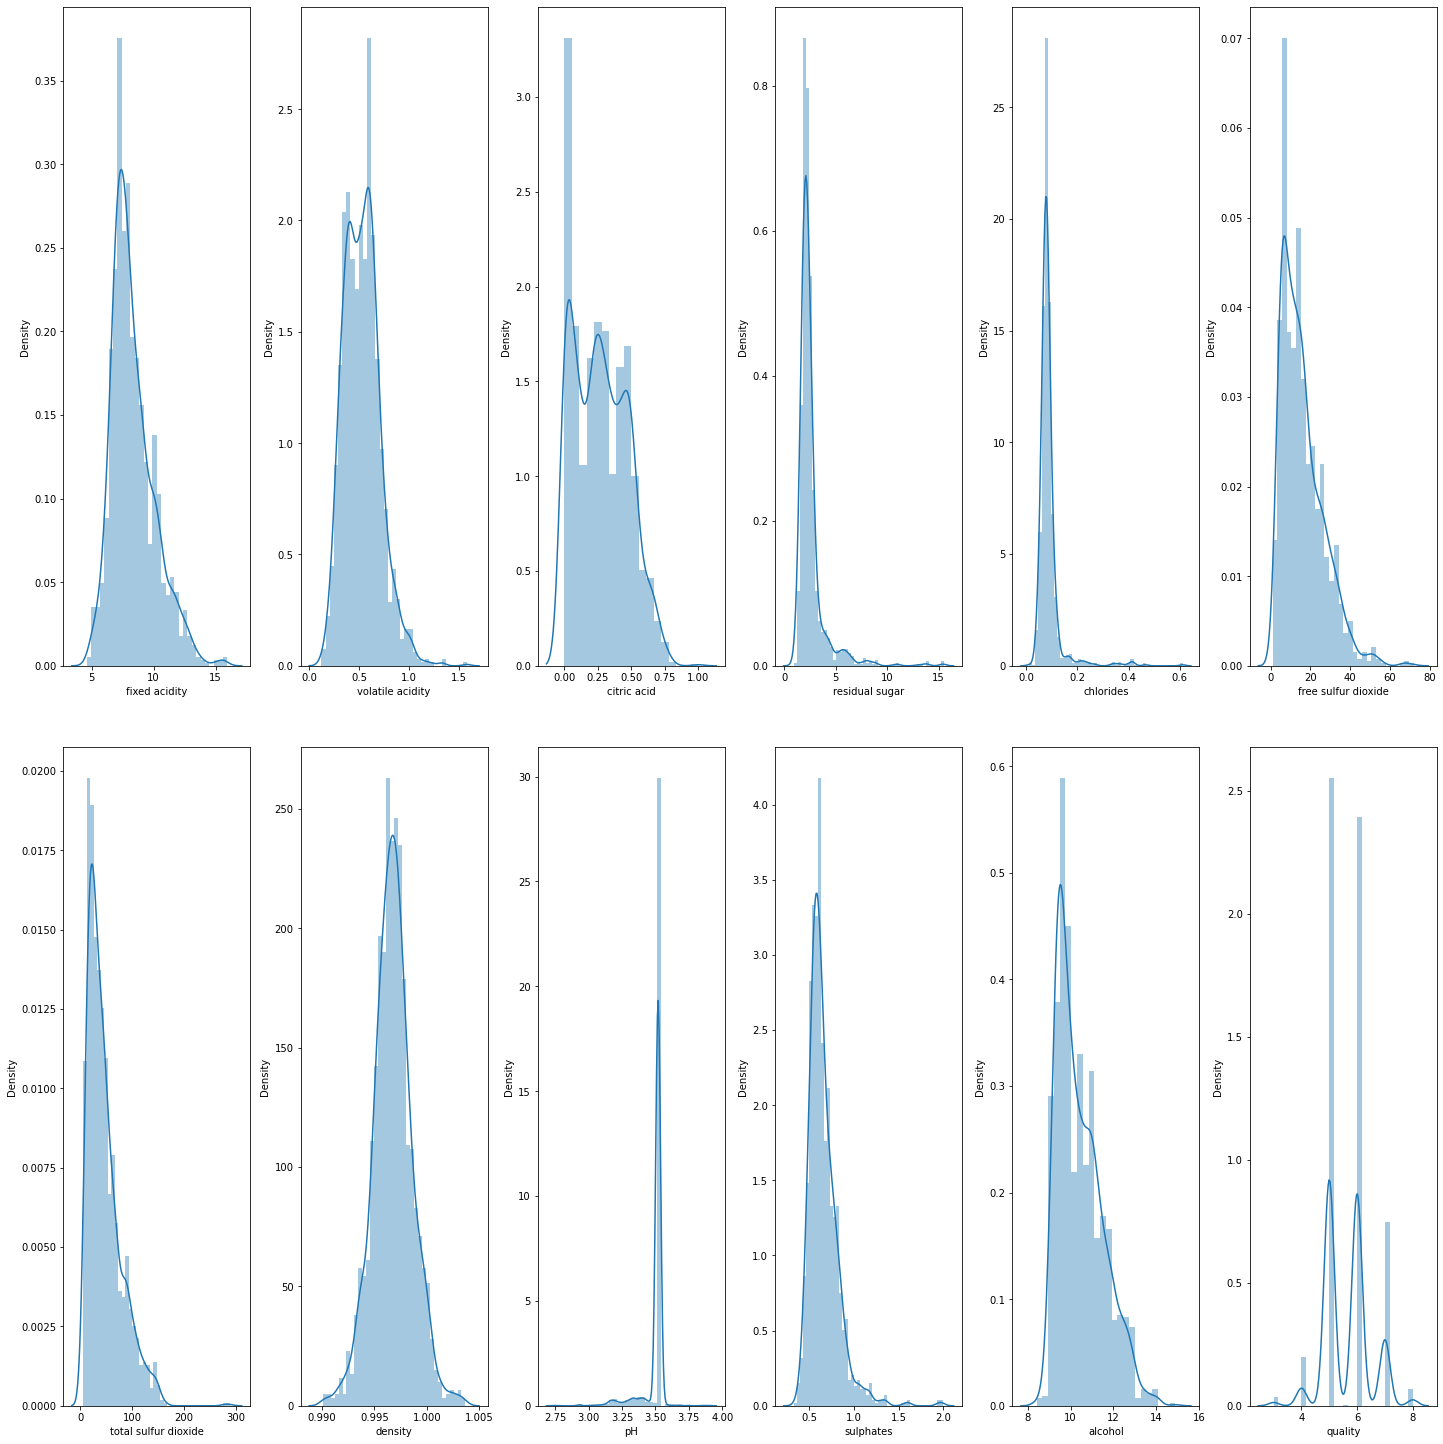

In [17]:
# creating distribution plots in shape of different graphs
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,20))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
# to make the graphs look good, we will add this line in code
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [18]:
# log transformation, because 'free sulfur dioxide' was in big range 
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

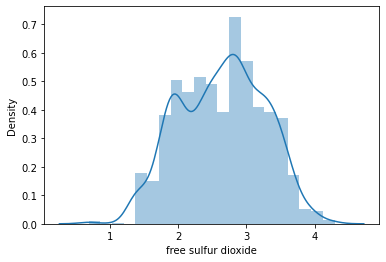

In [19]:
# displaying the new 'free sulphur dioxide' graph
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='quality', ylabel='Density'>

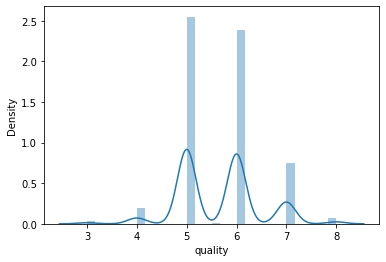

In [20]:
# display of 'quality' graph
sns.distplot(df['quality'])

<AxesSubplot:xlabel='quality', ylabel='count'>

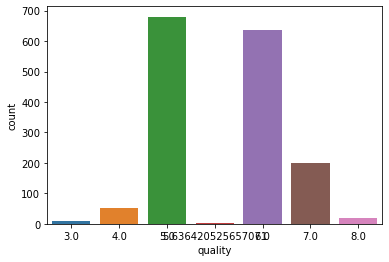

In [21]:
# checking classes for classifications through 'quality'
sns.countplot(df['quality'])

<AxesSubplot:>

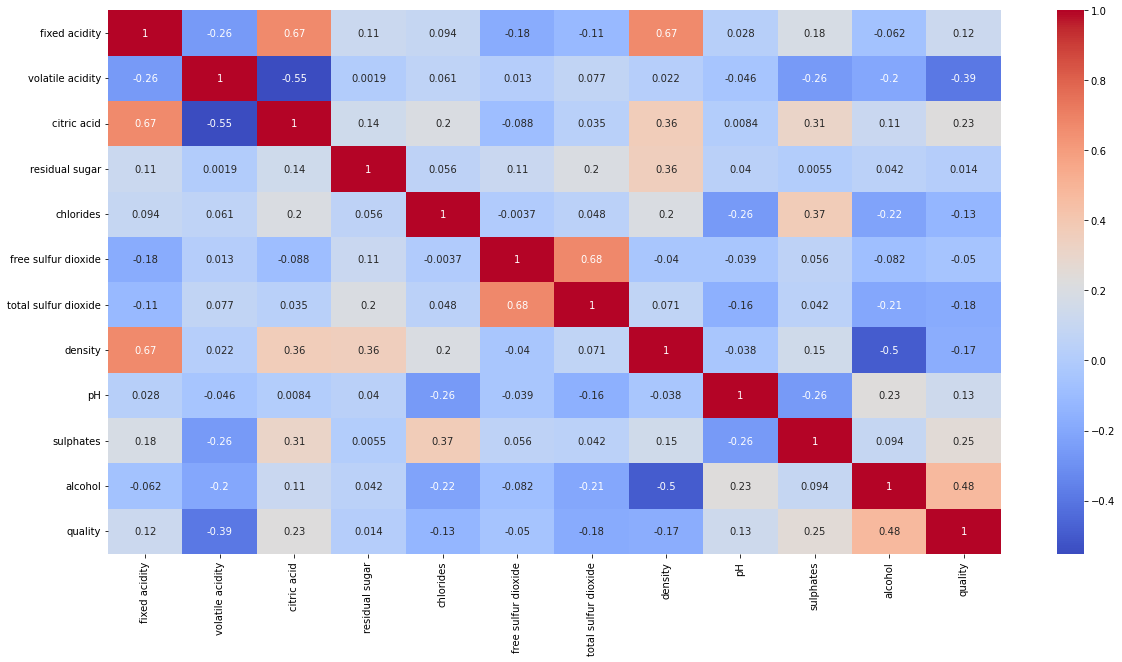

In [22]:
# Coorelation Matrix
corr = df.corr()
# for expanding the heatmap so that the figures are clearly visible, we use this:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

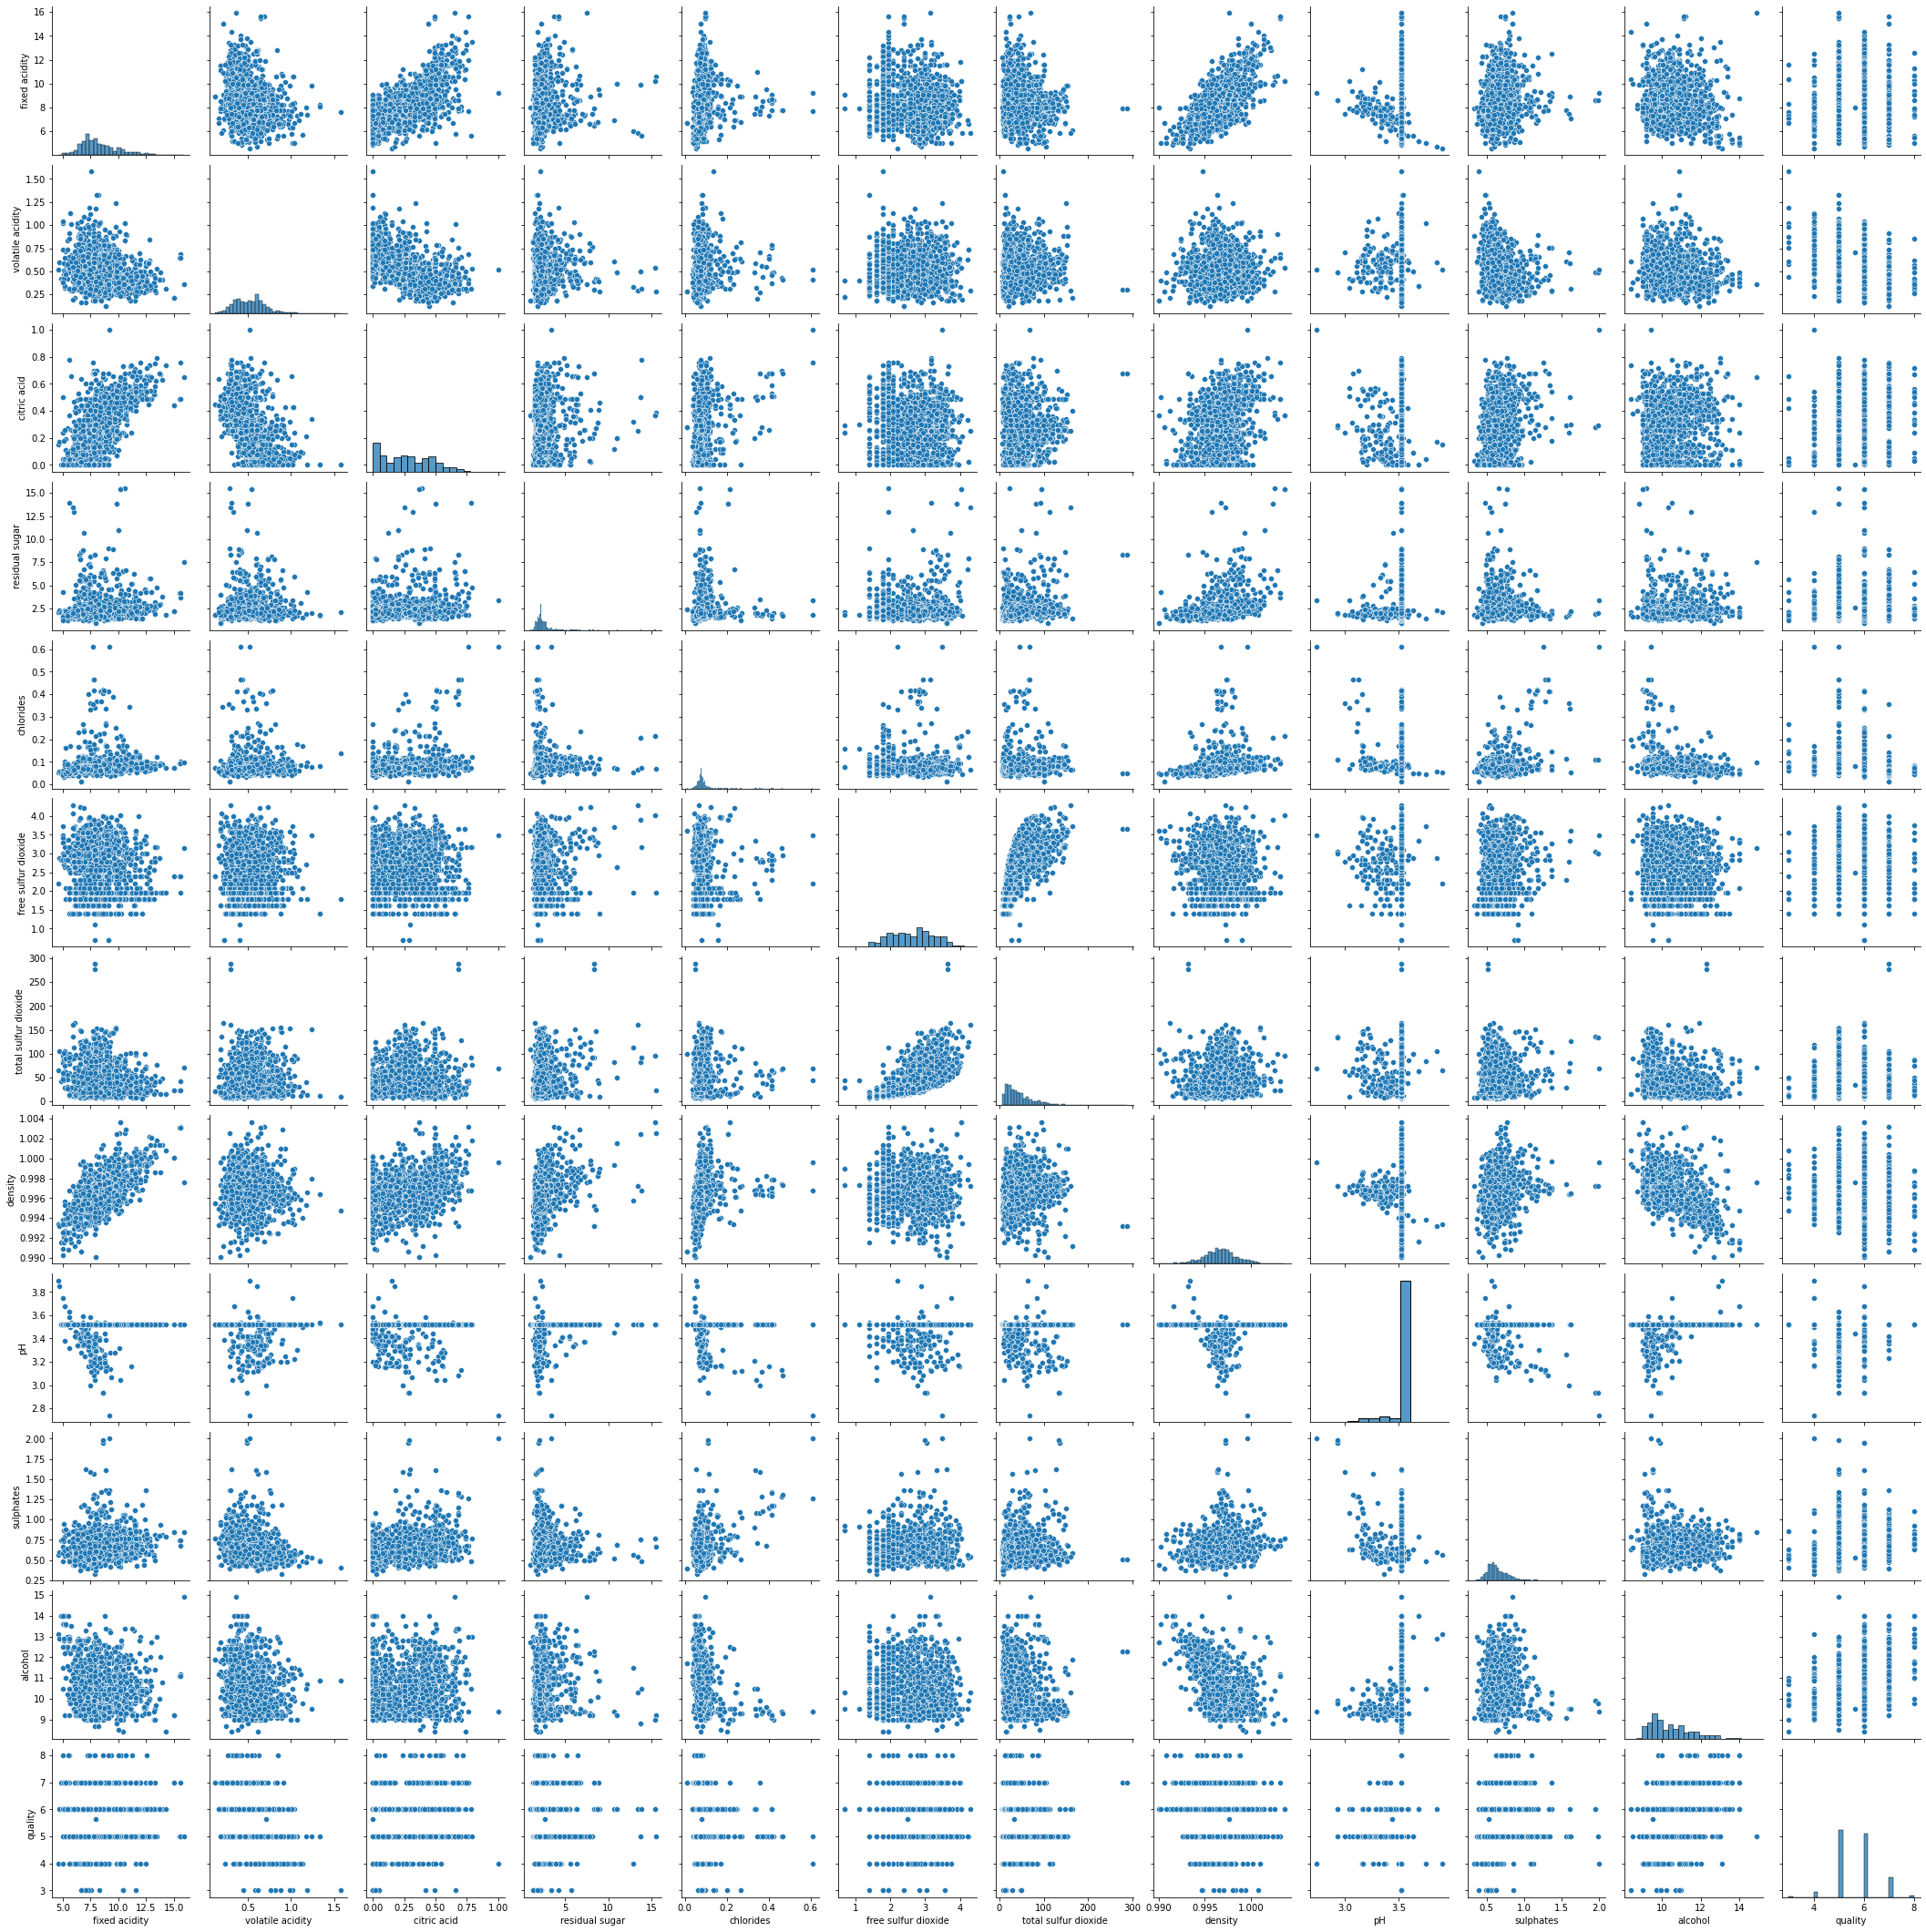

In [23]:
# to plot relations in variables among the dataset
sns.pairplot(df)

<AxesSubplot:>

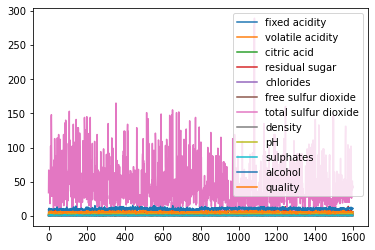

In [24]:
# to make plot of series  
df.plot()

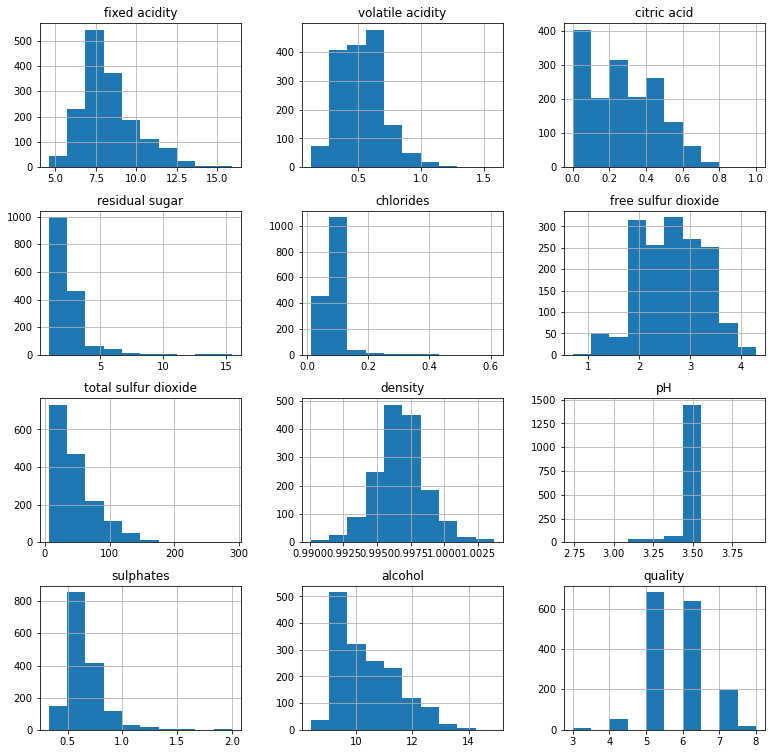

In [25]:
# to plot a histogram to show the distribution of values 
df.hist(figsize = (13,13))
plt.show()

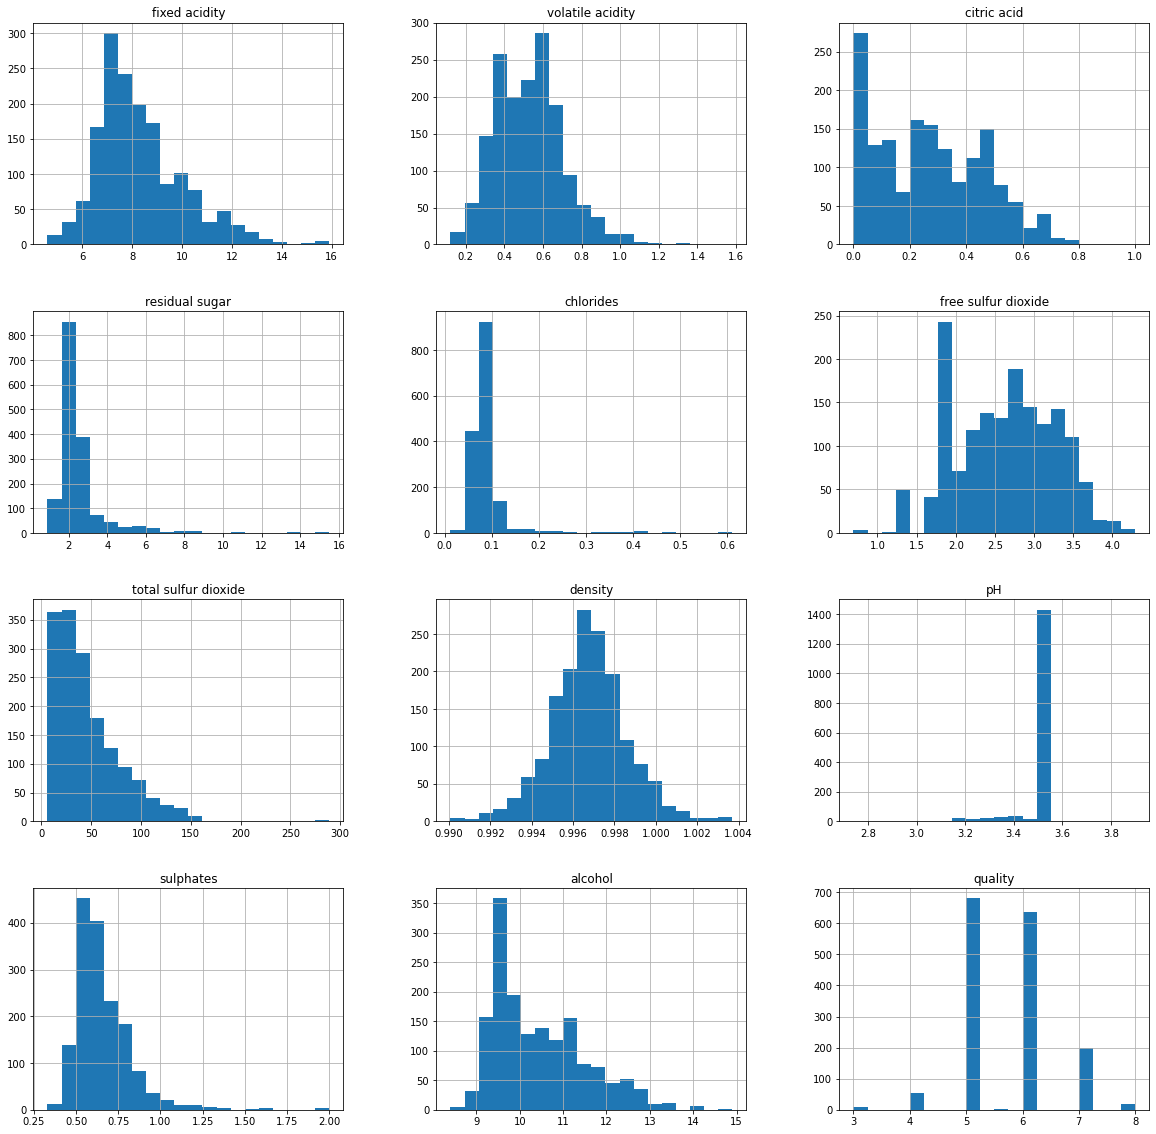

In [26]:
df.hist(bins=20, figsize=(20, 20))
plt.show()

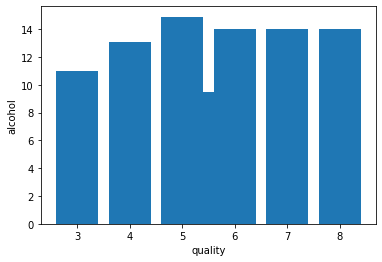

In [27]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

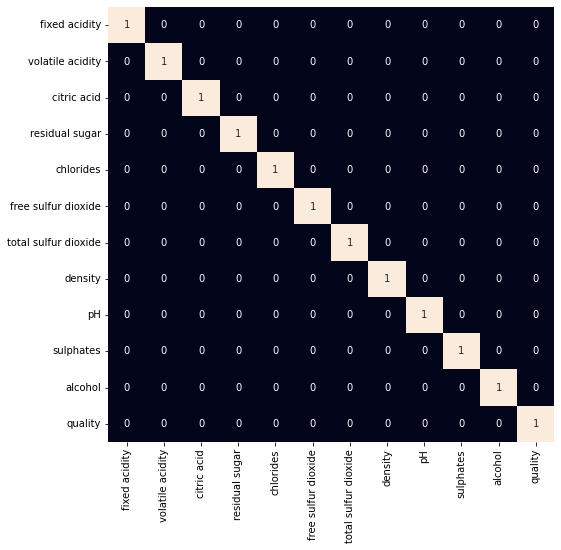

In [28]:
plt.figure(figsize=(8, 8))
sb.heatmap(df.corr() > 0.7, annot=True , cbar=False)
plt.show()

In [29]:
df = df.drop('total sulfur dioxide', axis=1)

In [55]:
# Input Split

In [56]:
# dropping the 'fixed acidity' and 'quality' from the dataset
X = df.drop(columns=['fixed acidity', 'quality'])
y = df['quality']

In [57]:
# before balancing
y.value_counts()

5.000000    680
6.000000    638
7.000000    199
4.000000     53
8.000000     18
3.000000     10
5.636421      1
Name: quality, dtype: int64

In [61]:
# classification function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)
    
    # cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)

In [62]:
#Model Development

In [63]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [64]:
df.replace({'white': 1, 'red': 0}, inplace=True)

In [65]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']
 
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40)
 
xtrain.shape, xtest.shape

((1279, 10), (320, 10))

In [66]:
# Normalising the data before training help us to achieve stable and fast training of the model.

In [67]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [68]:
#Model Training For Classification
# As the data has been prepared completely let’s train some state of the art machine learning model on it.

In [93]:
model = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
 
for i in range(3):
    model[i].fit(xtrain, ytrain)
 
    print(f'{model[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, model[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        ytest, model[i].predict(xtest)))
    print()

LogisticRegression() : 
Training Accuracy :  0.7287848713237102
Validation Accuracy :  0.7711257913570052

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.8209468758601707

SVC() : 
Training Accuracy :  0.7620053651969696
Validation Accuracy :  0.7847312335338759



In [96]:
# Model Evaluation

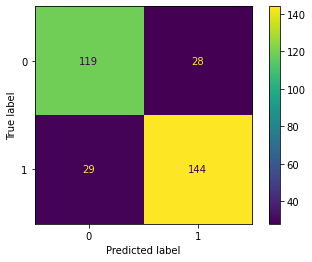

In [104]:
metrics.plot_confusion_matrix(models[1], xtest, ytest)
plt.show()

In [105]:
print(metrics.classification_report(ytest,
                                    models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       147
           1       0.84      0.83      0.83       173

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320

